Coding For CCA-Project 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import levene
from scipy.stats import shapiro, levene, bartlett
from pingouin import multivariate_normality
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA


In [6]:
def auto_label(number): 
    if number >= 1_000_000:
        return f"{number/1_000_000:.2f}M"
    elif number >= 1_000:
        return f"{number/1_000:.2f}K"
    else:
        return f"{number:.2f}"

In [7]:
df = pd.read_csv("C:\\Users\\k in g\\Downloads\\SampleSuperstore.csv", encoding="ISO-8859-1")

In [8]:
#Numeric Columns
df_numeric = df[['Sales', 'Profit', 'Quantity', 'Discount']] 


Descriptive Statistics

In [9]:
mean_vector = df_numeric.mean()
median_vector = df_numeric.median()
mode_vector = df_numeric.mode().iloc[0] 

summary_df = pd.DataFrame({
    'Mean': mean_vector,
    'Median': median_vector,
    'Mode': mode_vector
})

summary_labeled = summary_df.map(auto_label)
print(summary_labeled)


cov_matrix = df_numeric.cov()    
corr_matrix = df_numeric.corr()  

formatted_cov_matrix = cov_matrix.map(auto_label)  
print("\nCovariance Matrix:\n", formatted_cov_matrix)

formatted_corr_matrix = corr_matrix.map(auto_label)  
print("Correlation Matrix:\n", formatted_corr_matrix)



            Mean Median   Mode
Sales     229.86  54.49  12.96
Profit     28.66   8.67   0.00
Quantity    3.79   3.00   3.00
Discount    0.16   0.20   0.00

Covariance Matrix:
             Sales  Profit Quantity Discount
Sales     388.43K  69.94K   278.46    -3.63
Profit     69.94K  54.88K    34.53   -10.62
Quantity   278.46   34.53     4.95     0.00
Discount    -3.63  -10.62     0.00     0.04
Correlation Matrix:
           Sales Profit Quantity Discount
Sales      1.00   0.48     0.20    -0.03
Profit     0.48   1.00     0.07    -0.22
Quantity   0.20   0.07     1.00     0.01
Discount  -0.03  -0.22     0.01     1.00


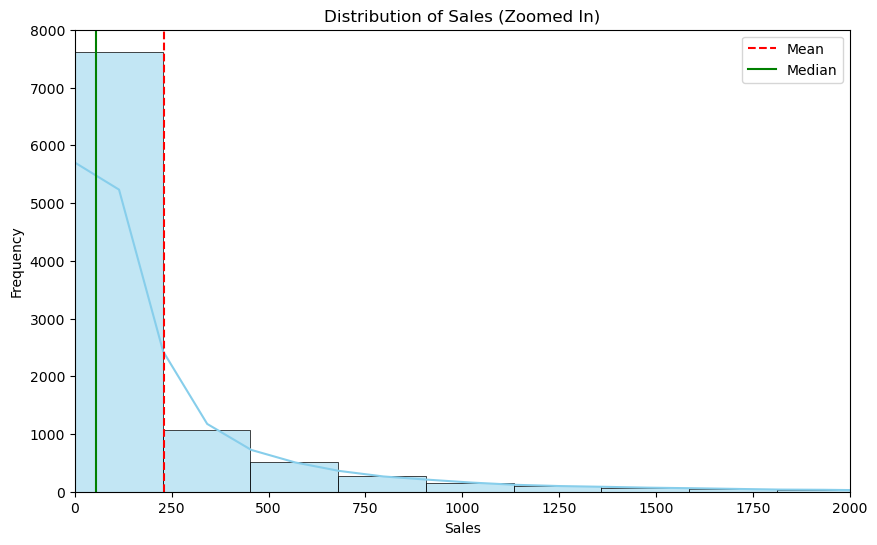

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=100, kde=True, color='skyblue')

plt.axvline(df['Sales'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['Sales'].median(), color='green', linestyle='-', label='Median')

plt.xlim(0, 2000) 
plt.title('Distribution of Sales (Zoomed In)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()


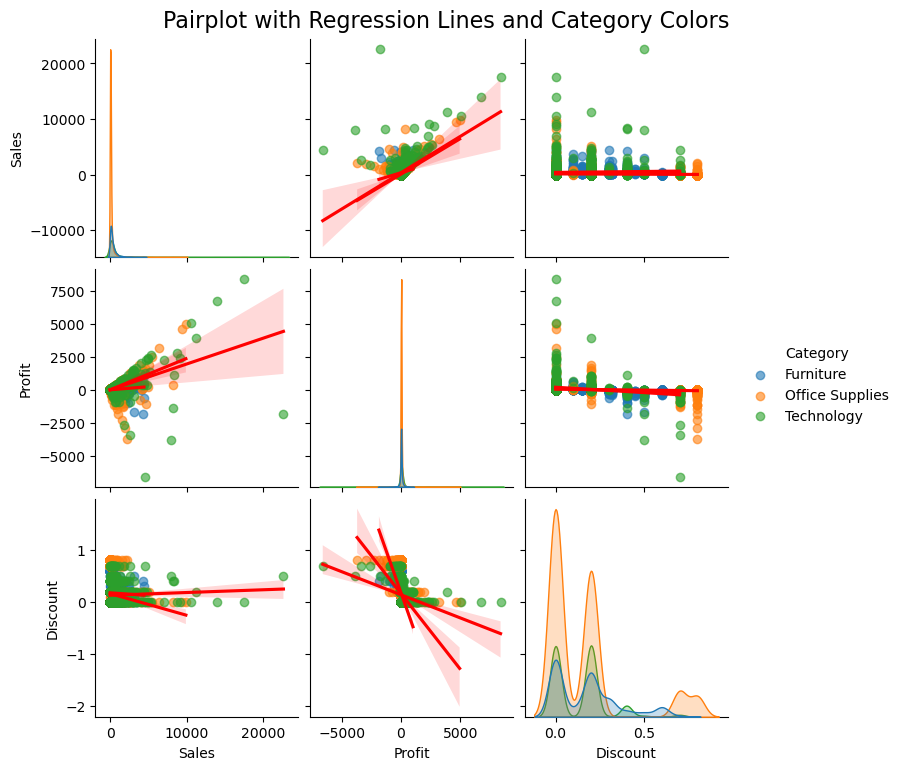

In [11]:

selected_columns = ['Sales', 'Profit','Discount', 'Category']

df_selected = df[selected_columns]

sns.pairplot(df_selected, 
             kind='reg',
             hue='Category',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}}
            )

plt.suptitle('Pairplot with Regression Lines and Category Colors', fontsize=16, y=1.02)
plt.show()


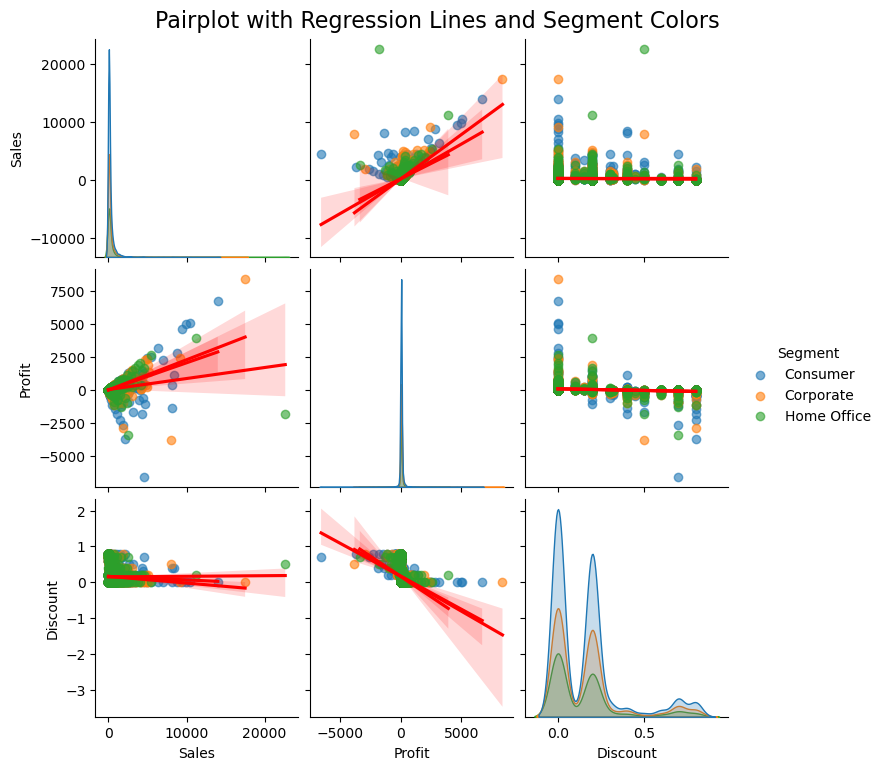

In [12]:
selected_columns = ['Sales', 'Profit','Discount', 'Segment']

df_selected = df[selected_columns]

sns.pairplot(df_selected, 
             kind='reg',
             hue='Segment',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}}
            )

plt.suptitle('Pairplot with Regression Lines and Segment Colors', fontsize=16, y=1.02)
plt.show()


Multivariate Normality Test


In [13]:
sample_df = df_numeric.sample(n=100, random_state=40)
result = multivariate_normality(sample_df, alpha=0.05)

print("Normality Test:Hypothesis: H0 = Data is multivariate normal")
print("Test Result:", result)

p_value = result[1]  
if p_value > 0.05:
    print( "\np_value =",p_value, ", p_value > 0.05"
          , "\nConclusion: Fail to reject H0 , Data is multivariate normal")
else:
    print("\np_value =",p_value, ", p_value < 0.05"
          , "\nConclusion: Reject H0 , Data is NOT multivariate normal")

Normality Test:Hypothesis: H0 = Data is multivariate normal
Test Result: HZResults(hz=10.292946835783786, pval=2.2428070053747884e-93, normal=False)

p_value = 2.2428070053747884e-93 , p_value < 0.05 
Conclusion: Reject H0 , Data is NOT multivariate normal


Test One Variances 

In [14]:
variance = df['Sales'].var()
formatted = f"{variance:.2f}"
print("Sales Variance =", formatted)
Sales_Describe = df['Sales'].describe()
formatted_Sales_Describe = Sales_Describe.apply(auto_label) 
print("Sales Describe =\n", formatted_Sales_Describe)

Sales Variance = 388434.46
Sales Describe =
 count     9.99K
mean     229.86
std      623.25
min        0.44
25%       17.28
50%       54.49
75%      209.94
max      22.64K
Name: Sales, dtype: object


Test of equal variances between any two populations 

In [15]:
 if 'Region' in df.columns:
    group1 = df[df['Region'] == 'East']['Sales'] 
    group2 = df[df['Region'] == 'West']['Sales']  
    
    print("Test for Equal Variances (Sales between East and West):")
    stat, p = levene(group1, group2)
    print("Hypothesis: H0 = Equal variances")
    print(f"p-value = {p}")
    
    if p > 0.05:
        print( "So p_value > 0.05","\nConclusion: Fail to reject H0 , Variances are equal.")
    else:
        print( "So p_value < 0.05","\nConclusion: Reject H0 , Variances are not equal.")

if 'Region' in df.columns:
    group3 = df[df['Region'] == 'Central']['Sales'] 
    group4 = df[df['Region'] == 'South']['Sales']  

if 'Region' in df.columns:
    group1 = df[df['Region'] == 'East']['Sales'] 
    group2 = df[df['Region'] == 'West']['Sales']  
    
    print("Test for Equal Variances (Sales between East and West):")
    stat, p = levene(group1, group2)
    print("Hypothesis: H0 = Equal variances")
    print(f"p-value = {p}")
    
    if p > 0.05:
        print("So p_value > 0.05", "\nConclusion: Fail to reject H0 , Variances are equal.")
    else:
        print("So p_value < 0.05", "\nConclusion: Reject H0 , Variances are not equal.")

# 2. اختبار Central vs South
if 'Region' in df.columns:
    group3 = df[df['Region'] == 'Central']['Sales'] 
    group4 = df[df['Region'] == 'South']['Sales']  
    
    print("\nTest for Equal Variances (Sales between Central and South):")
    stat, p = levene(group3, group4) 
    print("Hypothesis: H0 = Equal variances")
    print(f"p-value = {p}")
    
    if p > 0.05:
        print("So p_value > 0.05", "\nConclusion: Fail to reject H0 , Variances are equal.")
    else:
        print("So p_value < 0.05", "\nConclusion: Reject H0 , Variances are not equal.")




Test for Equal Variances (Sales between East and West):
Hypothesis: H0 = Equal variances
p-value = 0.3326422246496623
So p_value > 0.05 
Conclusion: Fail to reject H0 , Variances are equal.
Test for Equal Variances (Sales between East and West):
Hypothesis: H0 = Equal variances
p-value = 0.3326422246496623
So p_value > 0.05 
Conclusion: Fail to reject H0 , Variances are equal.

Test for Equal Variances (Sales between Central and South):
Hypothesis: H0 = Equal variances
p-value = 0.30864905968572703
So p_value > 0.05 
Conclusion: Fail to reject H0 , Variances are equal.


HeatMap
 

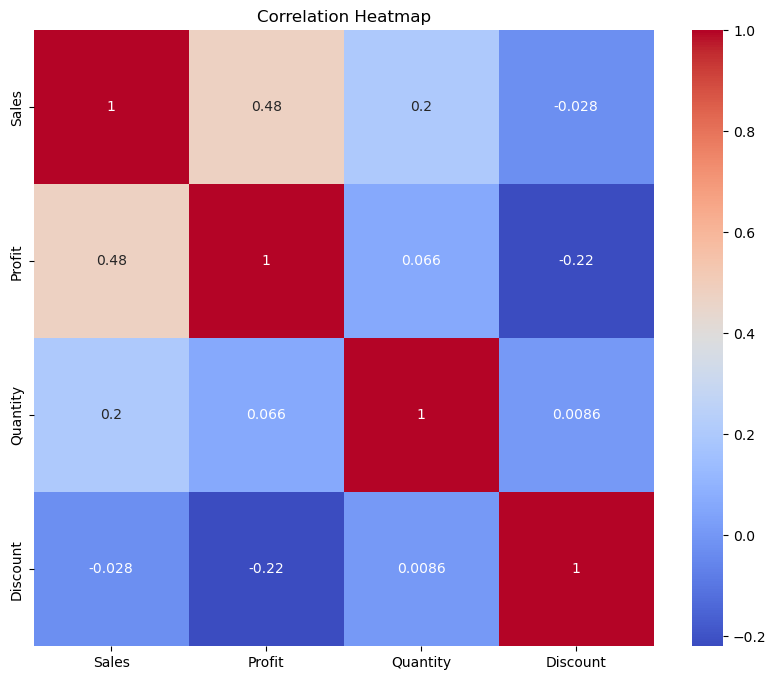

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Canonical Correspondence Analysis

In [17]:
categorical_cols = [ 'Ship Mode', 'Segment', 'Region', 'Category','Sub-Category']
numeric_cols = ['Sales','Profit']


In [18]:
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df[categorical_cols]).toarray()

Y = df[numeric_cols].values

In [25]:
for i in range(min(X_c.shape[1], Y_c.shape[1])):
    corr = np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1]
    print(f"Component {i+1}: Canonical Correlation = {corr:.3f}")


Component 1: Canonical Correlation = 0.454
Component 2: Canonical Correlation = 0.277


In [37]:
#Loadings for Component 1 & Component 2
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X_encoded, Y)

# Component 1
x_weights = pd.Series(cca.x_weights_[:, 0], index=encoder.get_feature_names_out(categorical_cols))
y_weights = pd.Series(cca.y_weights_[:, 0], index=numeric_cols)

print("X (Categorical Features) Loadings for Component 1:")
print(x_weights.sort_values(ascending=False))

print("\nY (Numeric Features) Loadings for Component 1:")
print(y_weights.sort_values(ascending=False))

X (Categorical Features) Loadings for Component 1:
Sub-Category_Machines       0.588715
Sub-Category_Copiers        0.490214
Sub-Category_Tables         0.283564
Sub-Category_Chairs         0.210487
Category_Technology         0.149861
Sub-Category_Bookcases      0.134529
Sub-Category_Storage        0.118955
Category_Furniture          0.099136
Sub-Category_Supplies       0.057787
Sub-Category_Appliances     0.052433
Region_South                0.036835
Segment_Home Office         0.020828
Ship Mode_Second Class      0.013412
Region_East                 0.009363
Sub-Category_Phones         0.005659
Ship Mode_Standard Class    0.004347
Segment_Corporate          -0.003977
Ship Mode_Same Day         -0.008708
Segment_Consumer           -0.012305
Region_Central             -0.012358
Ship Mode_First Class      -0.015154
Region_West                -0.026961
Sub-Category_Binders       -0.043674
Sub-Category_Envelopes     -0.069683
Sub-Category_Fasteners     -0.086239
Sub-Category_Labels     

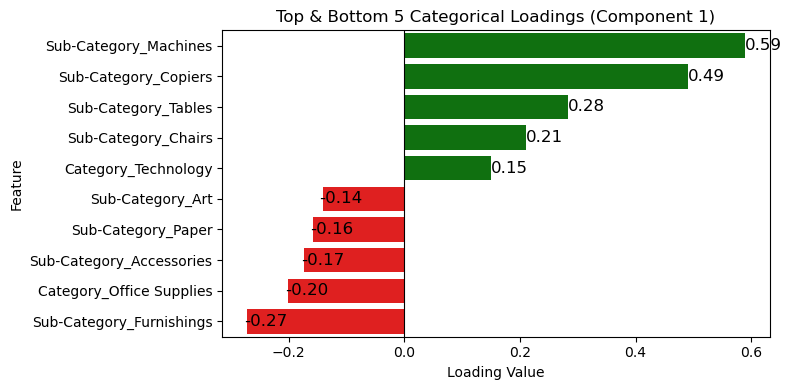

In [38]:
#Component 1
top_5_comp1 = x_weights.sort_values(ascending=False).head(5)  
bottom_5_comp1 = x_weights.sort_values().head(5) 

bottom_5_comp1 = bottom_5_comp1.sort_values(ascending=False)

comp1_data = pd.concat([top_5_comp1, bottom_5_comp1])
comp1_data = comp1_data.reset_index()
comp1_data.columns = ['Feature', 'Loading']

comp1_data['Color'] = comp1_data['Loading'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=comp1_data, x='Loading', y='Feature', hue='Color', dodge=False, palette={'Positive': 'green', 'Negative': 'red'})
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Top & Bottom 5 Categorical Loadings (Component 1)")
plt.xlabel("Loading Value")
plt.legend().remove()

for p in ax.patches:
    width = p.get_width()
    if abs(width) > 0.01:
        ax.annotate(f'{width:.2f}', 
                    (p.get_x() + p.get_width() + 0.02, p.get_y() + p.get_height() / 2),  
                    ha='center', va='center', fontsize=12, color='black',
                    xytext=(5,0), textcoords='offset points')

plt.tight_layout()
plt.show()

